In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [75]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
path=("/content/drive/MyDrive/Sales.xlsx")
data=pd.read_excel(path,sheet_name="Sales")

In [83]:
data.head()

,CustID,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,Gender,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore
0,7000000,4409,22.0,4.0,Agent,Salaried,Graduate,Female,3,Manager,2.0,Single,20993.0,1,2.0,806761.0,North,Half Yearly,5,2.0
1,7000001,2214,11.0,2.0,Third Party Partner,Salaried,Graduate,Male,4,Manager,4.0,Divorced,20130.0,0,3.0,294502.0,North,Yearly,7,3.0
2,7000002,4273,26.0,4.0,Agent,Free Lancer,Post Graduate,Male,4,Exe,3.0,Unmarried,17090.0,1,2.0,NaN,North,Yearly,0,3.0
3,7000003,1791,11.0,NaN,Third Party Partner,Salaried,Graduate,Fe male,3,Executive,3.0,Divorced,17909.0,1,2.0,268635.0,West,Half Yearly,0,5.0
4,7000004,2955,6.0,NaN,Agent,Small Business,UG,Male,3,Executive,4.0,Divorced,18468.0,0,4.0,366405.0,West,Half Yearly,2,5.0


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [85]:
df=data.drop(["CustID"],axis=1)

In [86]:
df.shape

(4520, 19)

In [87]:
df["Channel"].value_counts()

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64

In [88]:
df["Occupation"].value_counts()

Salaried           2192
Small Business     1918
Large Business      255
Laarge Business     153
Free Lancer           2
Name: Occupation, dtype: int64

In [89]:
df["Occupation"]=df["Occupation"].replace("Laarge Business","Large Business")

In [90]:
df["EducationField"].value_counts()

Graduate          1870
Under Graduate    1190
Diploma            496
Engineer           408
Post Graduate      252
UG                 230
MBA                 74
Name: EducationField, dtype: int64

In [91]:
df["EducationField"]=df["EducationField"].replace("Graduate","PG")
df["EducationField"]=df["EducationField"].replace("Post Graduate","PG")
df["EducationField"]=df["EducationField"].replace("MBA","PG")
df["EducationField"]=df["EducationField"].replace("Under Graduate","UG")
df["EducationField"]=df["EducationField"].replace("Engineer","UG")

In [92]:
df["Gender"].value_counts()

Male       2688
Female     1507
Fe male     325
Name: Gender, dtype: int64

In [93]:
df["Gender"]=df["Gender"].replace("Fe male","Female")

In [94]:
df["Designation"].value_counts()

Manager           1620
Executive         1535
Senior Manager     676
AVP                336
VP                 226
Exe                127
Name: Designation, dtype: int64

In [95]:
df["Designation"]=df["Designation"].replace("Exe","Executive")

In [96]:
df["MaritalStatus"].value_counts()

Married      2268
Single       1254
Divorced      804
Unmarried     194
Name: MaritalStatus, dtype: int64

In [97]:
df["MaritalStatus"]=df["MaritalStatus"].replace("Unmarried","Single")

In [98]:
df["Zone"].value_counts()

West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64

In [99]:
df["PaymentMethod"].value_counts()

Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: PaymentMethod, dtype: int64

In [100]:
df.isnull().sum()

AgentBonus                0
Age                     269
CustTenure              226
Channel                   0
Occupation                0
EducationField            0
Gender                    0
ExistingProdType          0
Designation               0
NumberOfPolicy           45
MaritalStatus             0
MonthlyIncome           236
Complaint                 0
ExistingPolicyTenure    184
SumAssured              154
Zone                      0
PaymentMethod             0
LastMonthCalls            0
CustCareScore            52
dtype: int64

In [101]:
df["Age"]=df["Age"].fillna(df["Age"].median())
df["CustTenure"]=df["CustTenure"].fillna(df["CustTenure"].median())
df["NumberOfPolicy"]=df["NumberOfPolicy"].fillna(df["NumberOfPolicy"].median())
df["MonthlyIncome"]=df["MonthlyIncome"].fillna(df["MonthlyIncome"].median())
df["ExistingPolicyTenure"]=df["ExistingPolicyTenure"].fillna(df["ExistingPolicyTenure"].median())
df["SumAssured"]=df["SumAssured"].fillna(df["SumAssured"].median())
df["CustCareScore"]=df["CustCareScore"].fillna(df["CustCareScore"].median())

#Univariate Analysis

In [102]:
df_num=df.select_dtypes("float64","int64")
df_cat=df.select_dtypes("object")

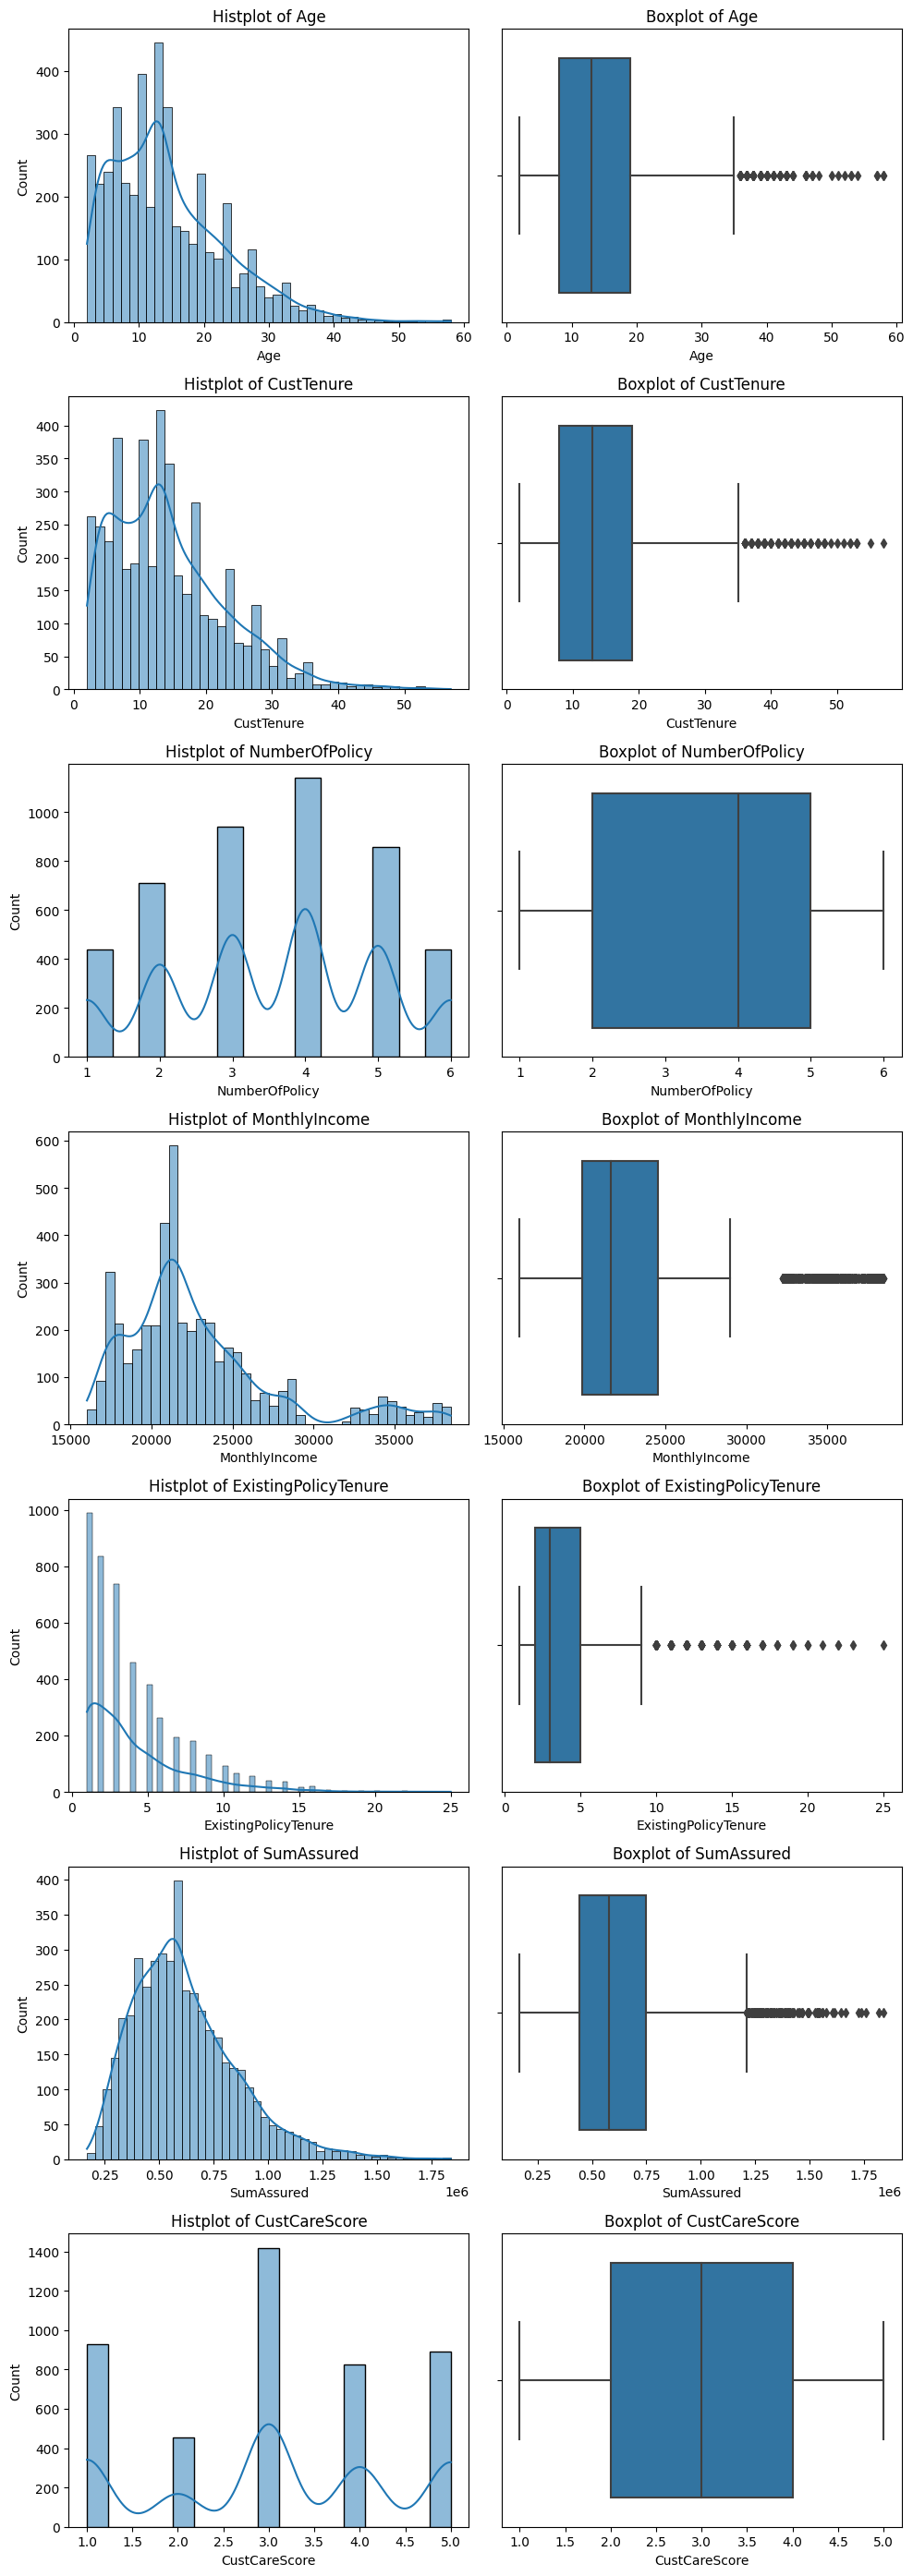

In [103]:
fig, axes= plt.subplots(nrows=len(df_num.columns),ncols=2,figsize=(10,4*len(df_num.columns)))
for i, column in enumerate(df_num.columns):
  sns.histplot(x=df_num[column],kde=True,ax=axes[i,0])
  axes[i,0].set_title("Histplot of "+column)

  sns.boxplot(x=df_num[column],ax=axes[i,1])
  axes[i,1].set_title("Boxplot of "+column)
plt.tight_layout()
plt.show()

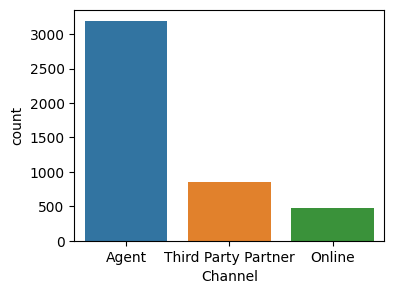

In [104]:
plt.figure(figsize=(4,3))
sns.countplot(data=df,x=df["Channel"]);

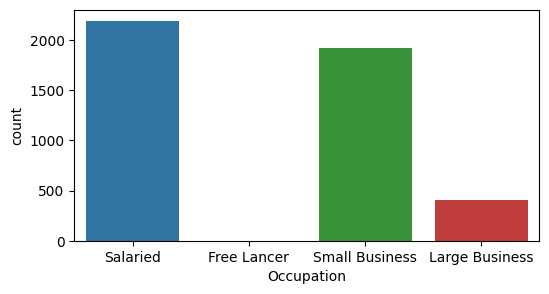

In [105]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x=df["Occupation"]);

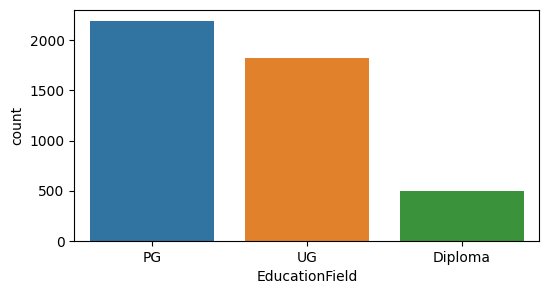

In [106]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x=df["EducationField"]);

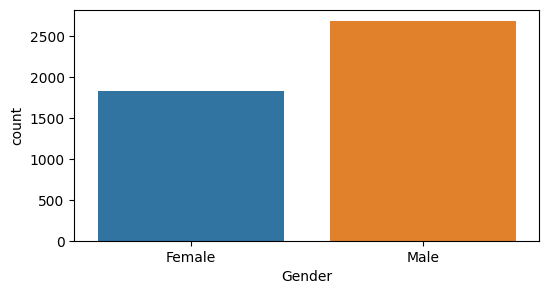

In [107]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x=df["Gender"]);

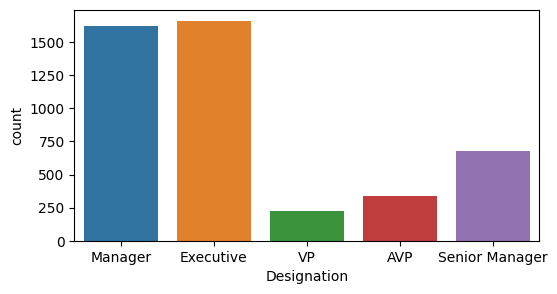

In [108]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x=df["Designation"]);

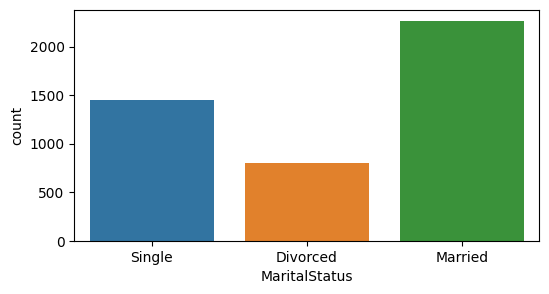

In [109]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x=df["MaritalStatus"]);

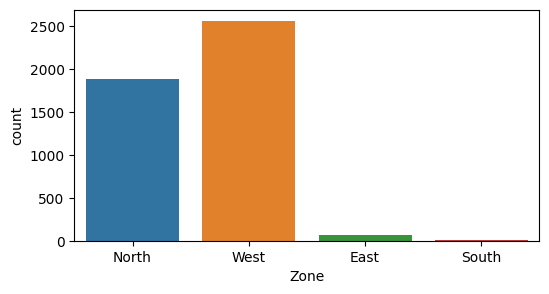

In [110]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x=df["Zone"]);

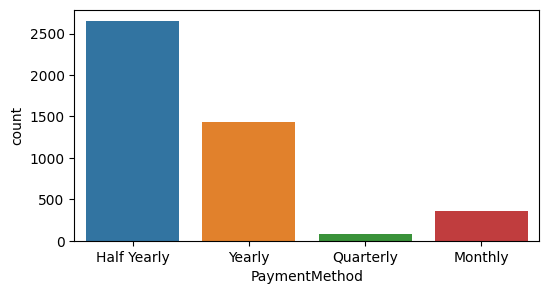

In [111]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x=df["PaymentMethod"]);

#Bivariate analysis

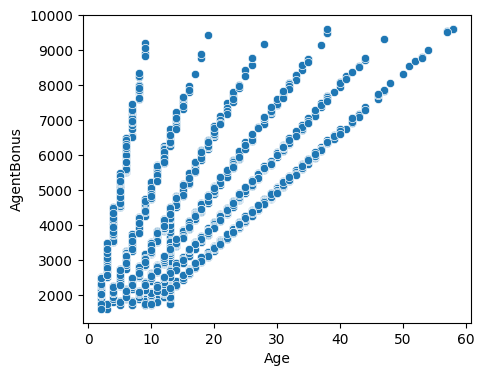

In [112]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["Age"]);

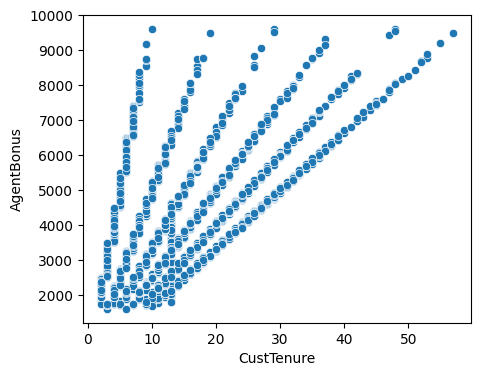

In [113]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["CustTenure"]);

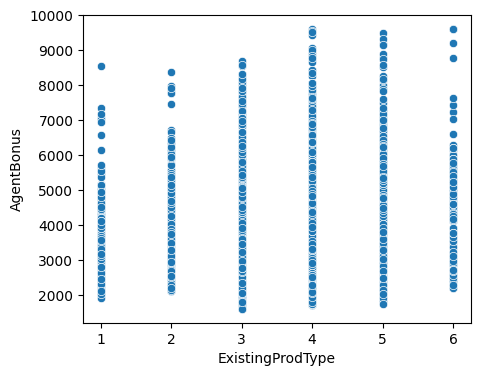

In [114]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["ExistingProdType"]);

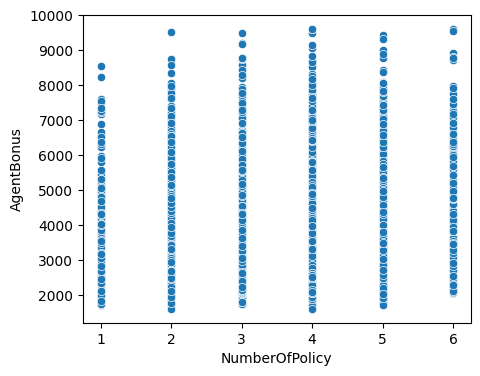

In [115]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["NumberOfPolicy"]);

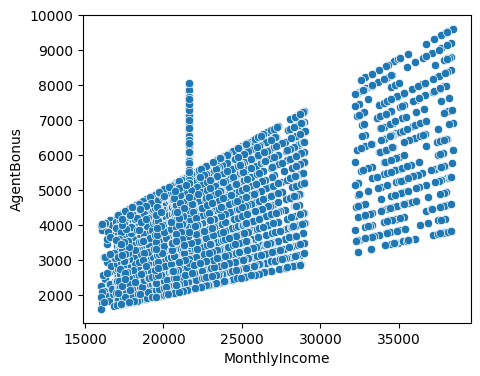

In [116]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["MonthlyIncome"]);

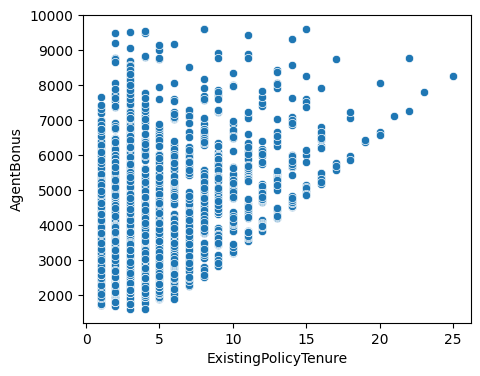

In [117]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["ExistingPolicyTenure"]);

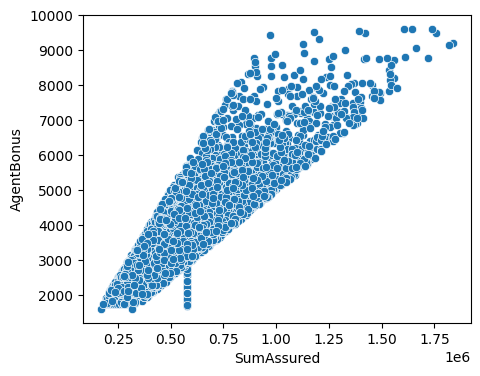

In [118]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["SumAssured"]);

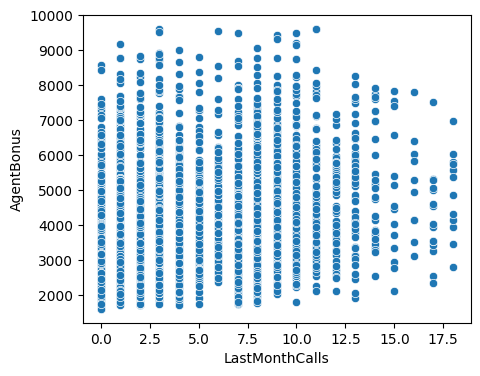

In [119]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["LastMonthCalls"]);

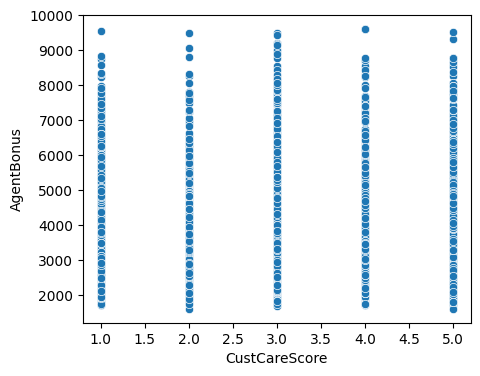

In [120]:
plt.figure(figsize=(5,4))
sns.scatterplot(y=df["AgentBonus"],x=df["CustCareScore"]);

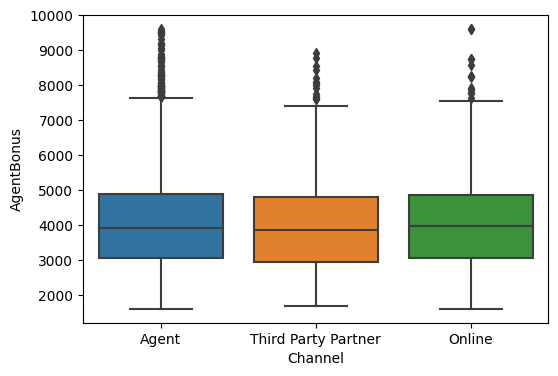

In [121]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Channel"],y=df["AgentBonus"]);

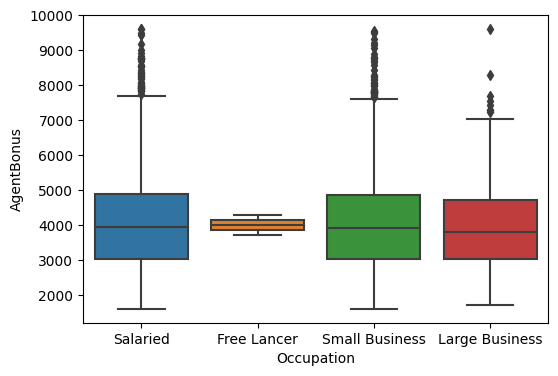

In [122]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Occupation"],y=df["AgentBonus"]);

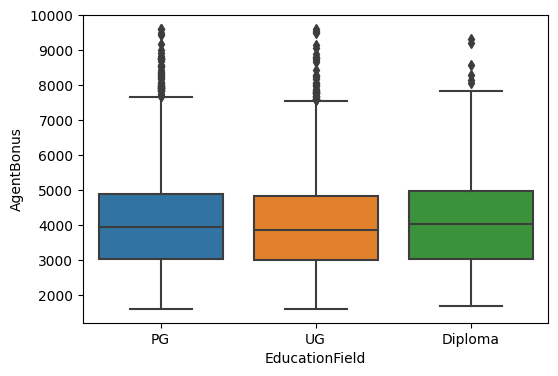

In [123]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["EducationField"],y=df["AgentBonus"]);

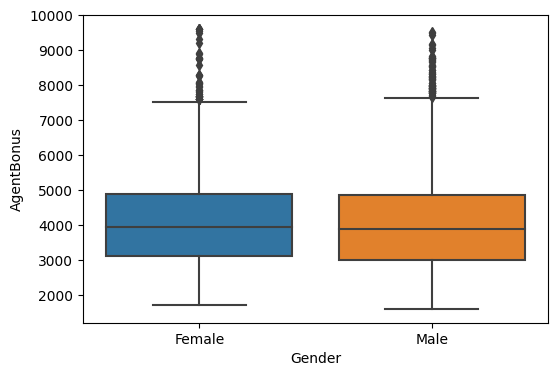

In [124]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Gender"],y=df["AgentBonus"]);

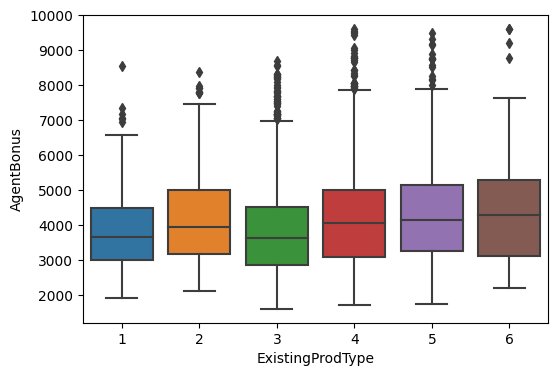

In [125]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["ExistingProdType"],y=df["AgentBonus"]);

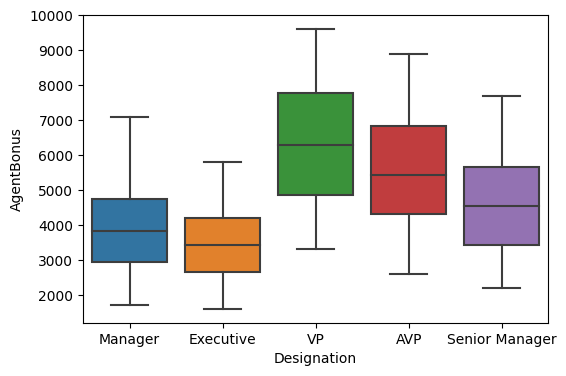

In [126]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Designation"],y=df["AgentBonus"]);

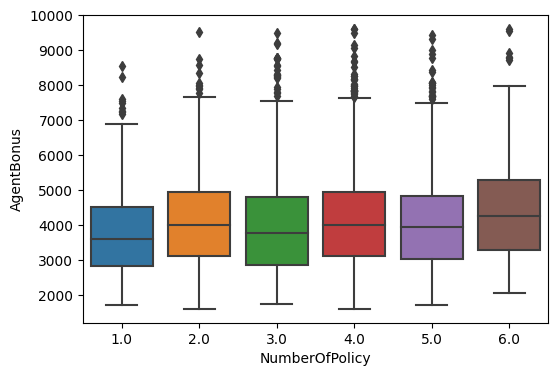

In [127]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["NumberOfPolicy"],y=df["AgentBonus"]);

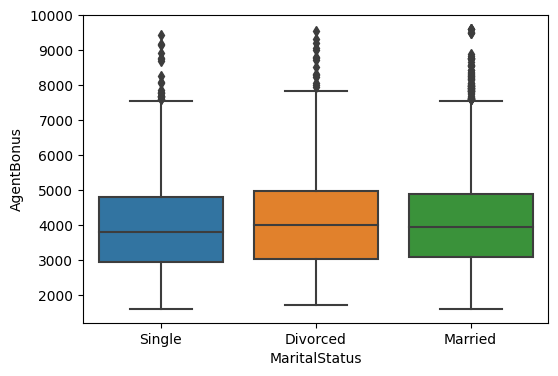

In [128]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["MaritalStatus"],y=df["AgentBonus"]);

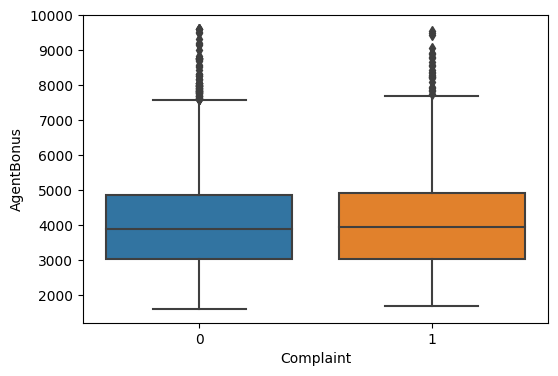

In [129]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Complaint"],y=df["AgentBonus"]);

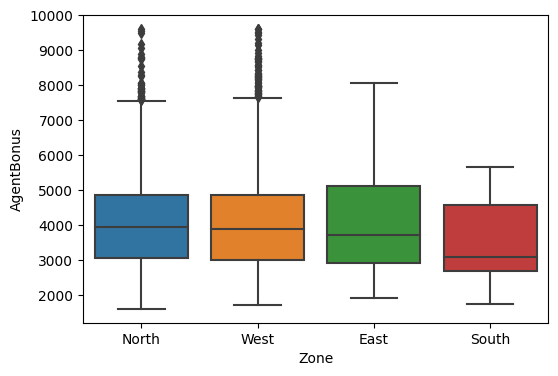

In [130]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Zone"],y=df["AgentBonus"]);

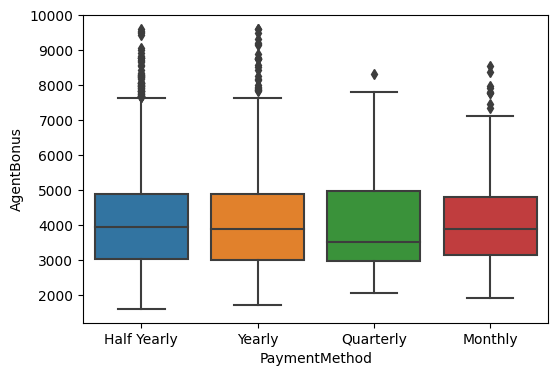

In [131]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["PaymentMethod"],y=df["AgentBonus"]);

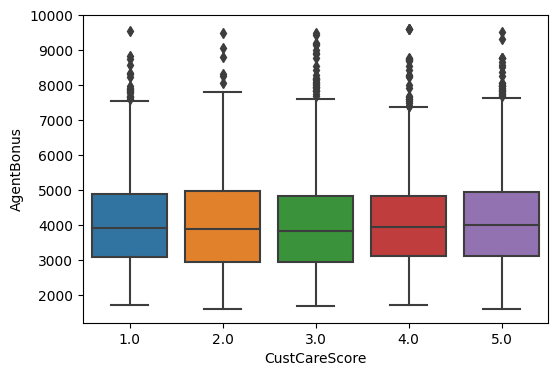

In [132]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["CustCareScore"],y=df["AgentBonus"]);

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4520 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4520 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4520 non-null   float64
 14  SumAssured            4520 non-null   float64
 15  Zone                 

<Figure size 1500x1000 with 0 Axes>

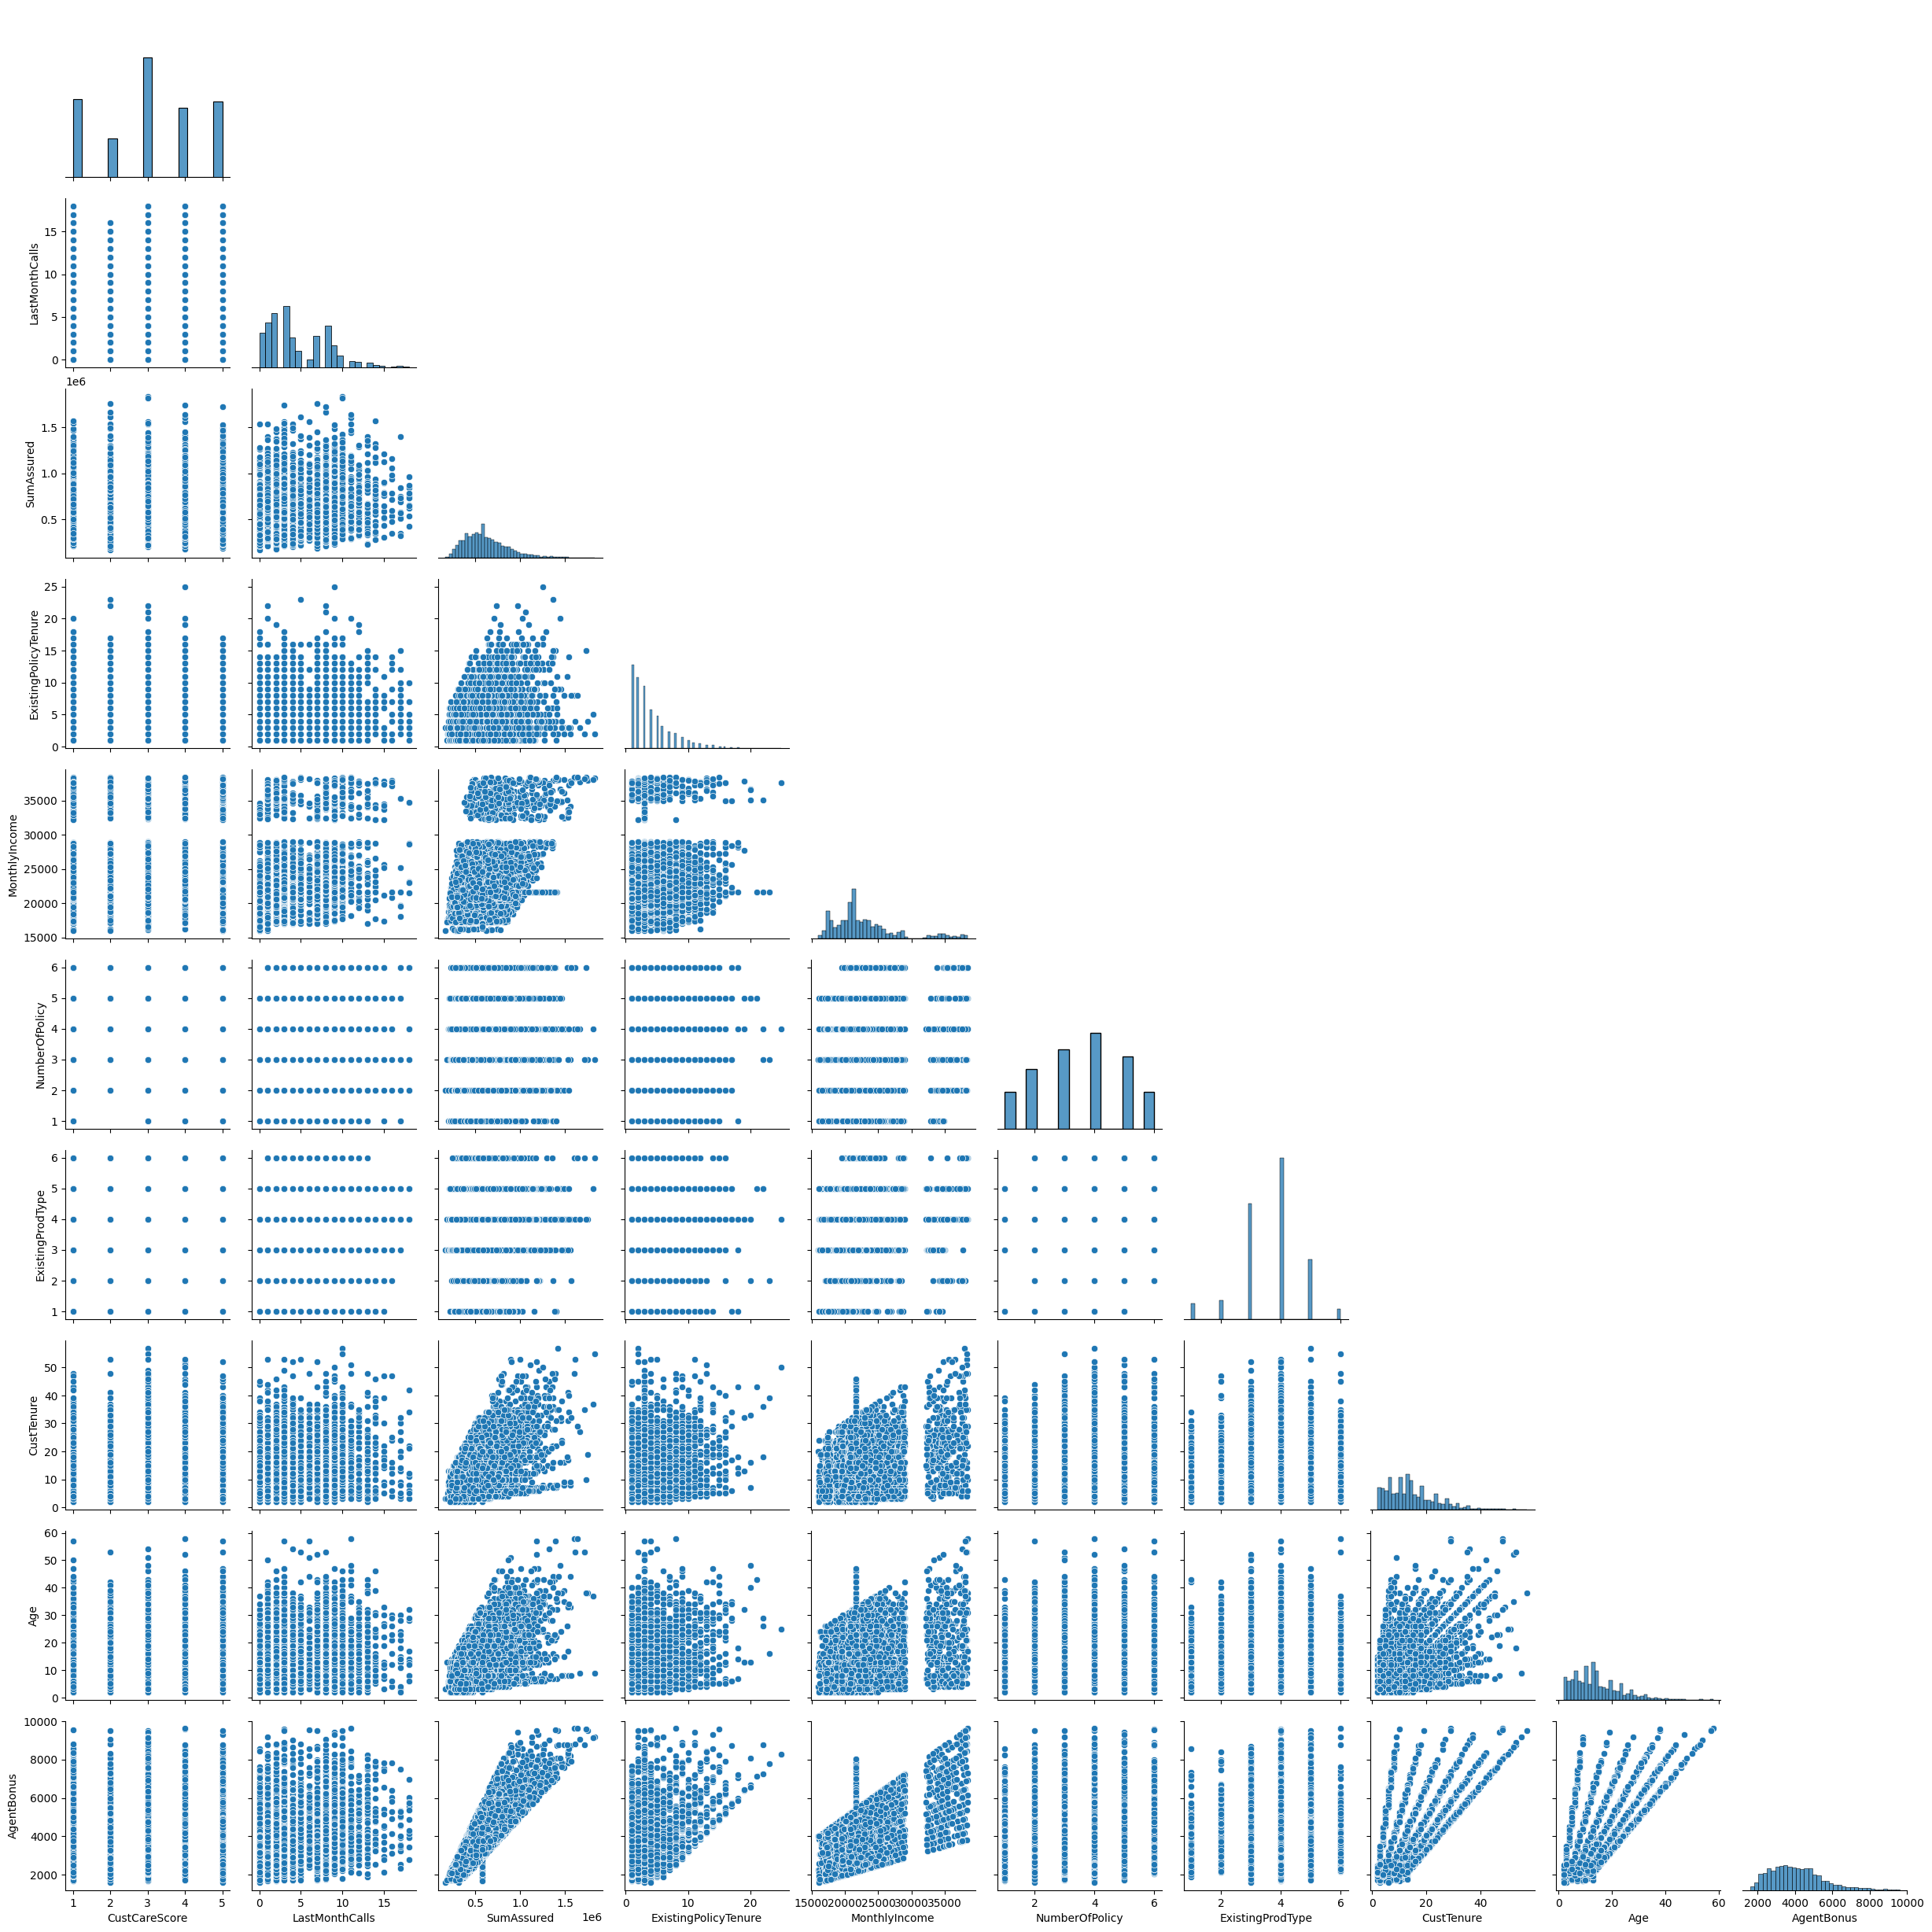

In [134]:
plt.figure(figsize=(15,10))
sns.pairplot(data=df,vars=["CustCareScore","LastMonthCalls","SumAssured","ExistingPolicyTenure",
                     "MonthlyIncome","NumberOfPolicy","ExistingProdType","CustTenure","Age","AgentBonus"],corner=True)

<Axes: >

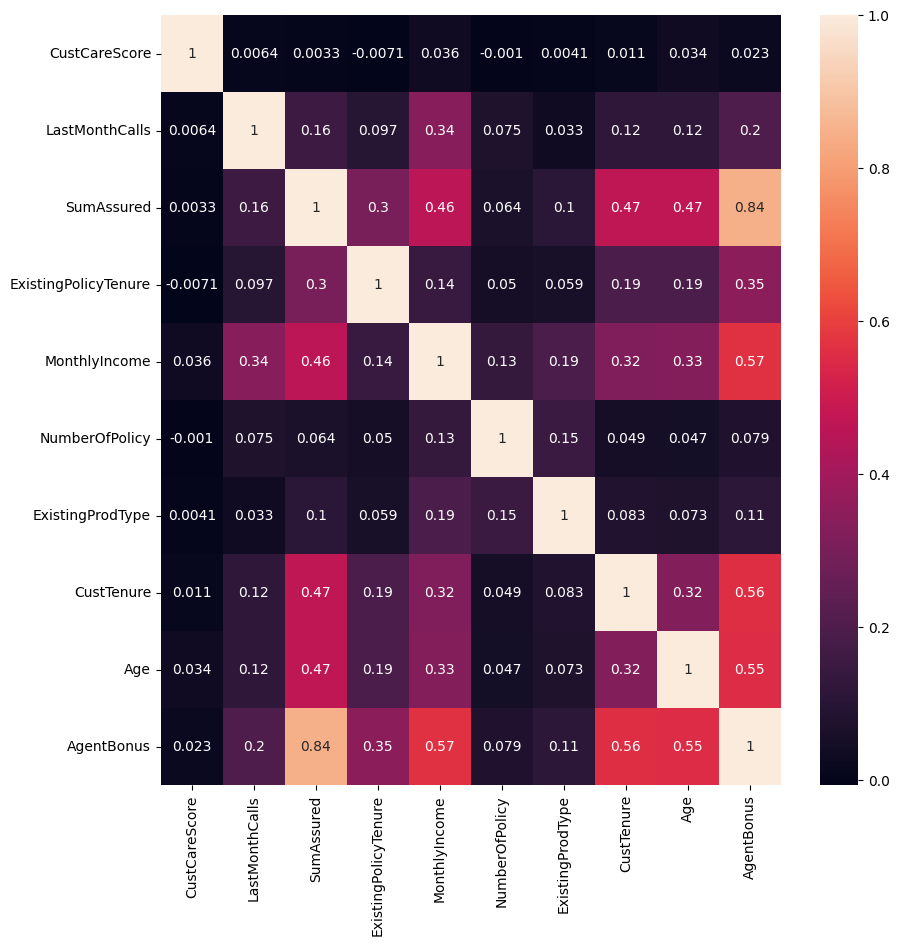

In [135]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df[["CustCareScore","LastMonthCalls","SumAssured","ExistingPolicyTenure",
                     "MonthlyIncome","NumberOfPolicy","ExistingProdType","CustTenure","Age","AgentBonus"]].corr(),annot=True,cbar=True)

In [138]:
df["Channel"].value_counts()

Agent                  3194
Third Party Partner     858
Online                  468
Name: Channel, dtype: int64

In [139]:
df["Channel"]=df["Channel"].astype("category")
df["Channel"]=df["Channel"].cat.codes
df["Channel"].value_counts()

0    3194
2     858
1     468
Name: Channel, dtype: int64

In [140]:
df["Occupation"].value_counts()

Salaried          2192
Small Business    1918
Large Business     408
Free Lancer          2
Name: Occupation, dtype: int64

In [141]:
df["Occupation"]=df["Occupation"].astype("category")
df["Occupation"]=df["Occupation"].cat.codes
df["Occupation"].value_counts()

2    2192
3    1918
1     408
0       2
Name: Occupation, dtype: int64

In [142]:
df["EducationField"].value_counts()

PG         2196
UG         1828
Diploma     496
Name: EducationField, dtype: int64

In [143]:
df["EducationField"]=np.where(df["EducationField"]=="Diploma",0,df["EducationField"])
df["EducationField"]=np.where(df["EducationField"]=="UG",1,df["EducationField"])
df["EducationField"]=np.where(df["EducationField"]=="PG",2,df["EducationField"])
df["EducationField"].value_counts()

2    2196
1    1828
0     496
Name: EducationField, dtype: int64

In [144]:
df["Gender"].value_counts()

Male      2688
Female    1832
Name: Gender, dtype: int64

In [145]:
df["Designation"].value_counts()

Executive         1662
Manager           1620
Senior Manager     676
AVP                336
VP                 226
Name: Designation, dtype: int64

In [146]:
df["Designation"]=np.where(df["Designation"]=="Executive",0,df["Designation"])
df["Designation"]=np.where(df["Designation"]=="Manager",1,df["Designation"])
df["Designation"]=np.where(df["Designation"]=="Senior Manager",2,df["Designation"])
df["Designation"]=np.where(df["Designation"]=="AVP",3,df["Designation"])
df["Designation"]=np.where(df["Designation"]=="VP",4,df["Designation"])
df["Designation"].value_counts()

0    1662
1    1620
2     676
3     336
4     226
Name: Designation, dtype: int64

In [147]:
df["MaritalStatus"].value_counts()

Married     2268
Single      1448
Divorced     804
Name: MaritalStatus, dtype: int64

In [148]:
df["MaritalStatus"]=df["MaritalStatus"].astype("category")
df["MaritalStatus"]=df["MaritalStatus"].cat.codes
df["MaritalStatus"].value_counts()

1    2268
2    1448
0     804
Name: MaritalStatus, dtype: int64

In [149]:
df["PaymentMethod"].value_counts()

Half Yearly    2656
Yearly         1434
Monthly         354
Quarterly        76
Name: PaymentMethod, dtype: int64

In [150]:
df["PaymentMethod"]=np.where(df["PaymentMethod"]=="Monthly",0,df["PaymentMethod"])
df["PaymentMethod"]=np.where(df["PaymentMethod"]=="Quarterly",1,df["PaymentMethod"])
df["PaymentMethod"]=np.where(df["PaymentMethod"]=="Half Yearly",2,df["PaymentMethod"])
df["PaymentMethod"]=np.where(df["PaymentMethod"]=="Yearly",3,df["PaymentMethod"])
df["PaymentMethod"].value_counts()

2    2656
3    1434
0     354
1      76
Name: PaymentMethod, dtype: int64

In [171]:
df["Zone"].value_counts()

West     2566
North    1884
East       64
South       6
Name: Zone, dtype: int64

In [172]:
df["Zone"]=df["Zone"].astype("category")
df["Zone"]=df["Zone"].cat.codes
df["Zone"].value_counts()

3    2566
1    1884
0      64
2       6
Name: Zone, dtype: int64

In [173]:
df["EducationField"]=df["EducationField"].astype("int64")
df["Designation"]=df["Designation"].astype("int64")
df["PaymentMethod"]=df["PaymentMethod"].astype("int64")
df["Zone"]=df["Zone"].astype("int64")

In [174]:
df_new=pd.get_dummies(data=df,columns=["Gender"],drop_first=True)
df_new.head()

,AgentBonus,Age,CustTenure,Channel,Occupation,EducationField,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Gender_Male
0,4409,22.0,4.0,0,2,2,3,1,2.0,2,20993.0,1,2.0,806761.0,1,2,5,2.0,0
1,2214,11.0,2.0,2,2,2,4,1,4.0,0,20130.0,0,3.0,294502.0,1,3,7,3.0,1
2,4273,26.0,4.0,0,0,2,4,0,3.0,2,17090.0,1,2.0,578976.5,1,3,0,3.0,1
3,1791,11.0,13.0,2,2,2,3,0,3.0,0,17909.0,1,2.0,268635.0,3,2,0,5.0,0
4,2955,6.0,13.0,0,3,1,3,0,4.0,0,18468.0,0,4.0,366405.0,3,2,2,5.0,1


<Axes: >

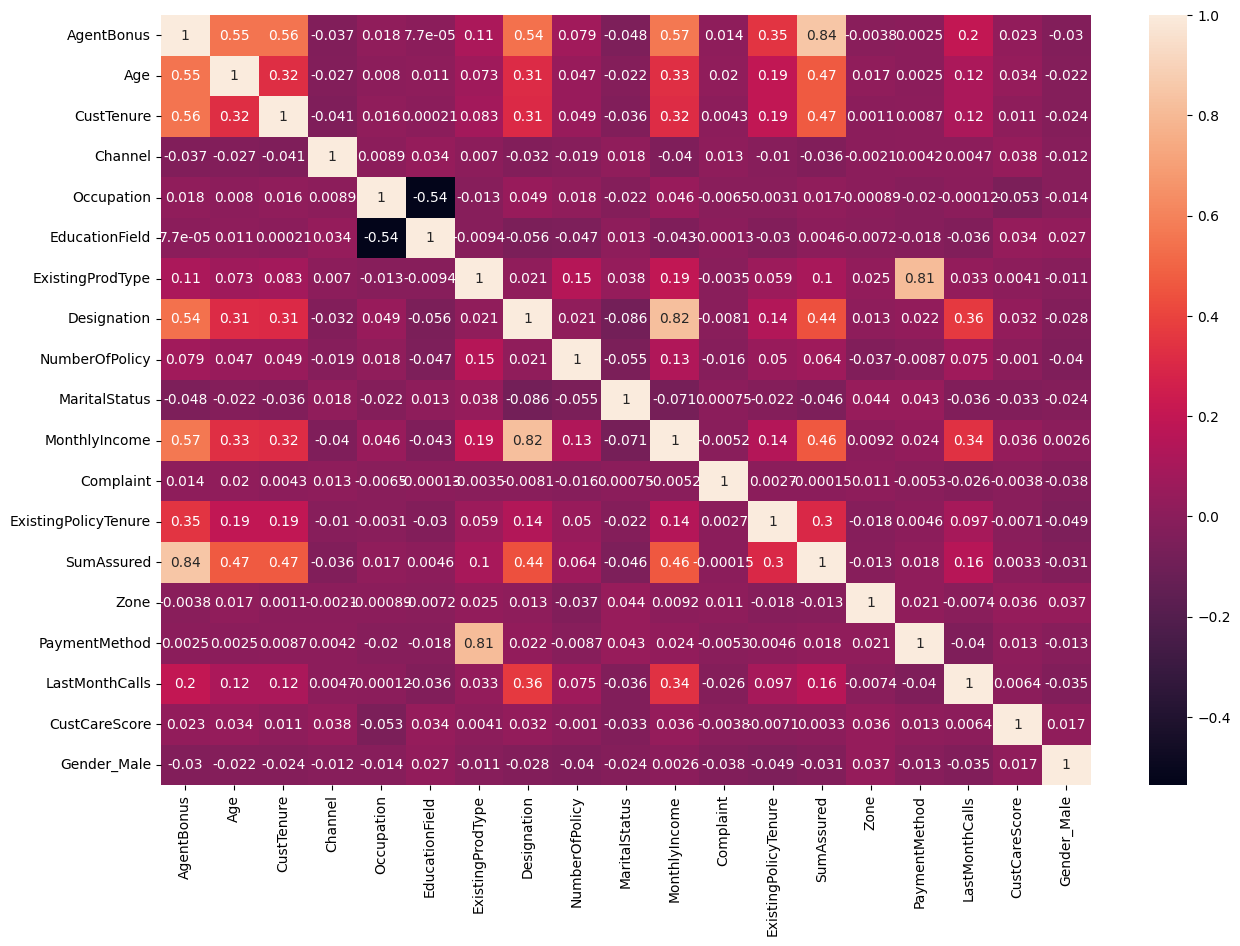

In [181]:
plt.figure(figsize=(15,10))
sns.heatmap(data=df_new.corr(),annot=True,cbar=True)

In [175]:
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [176]:
x=df_new.drop(["AgentBonus"],axis=1)
y=df_new["AgentBonus"]

In [177]:
x=sm.add_constant(x)

In [178]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
x_test.head()

,const,Age,CustTenure,Channel,Occupation,EducationField,ExistingProdType,Designation,NumberOfPolicy,MaritalStatus,MonthlyIncome,Complaint,ExistingPolicyTenure,SumAssured,Zone,PaymentMethod,LastMonthCalls,CustCareScore,Gender_Male
610,1.0,11.0,23.0,2,2,2,3,1,2.0,2,22756.0,0,1.0,785082.0,3,2,4,2.0,1
1519,1.0,20.0,7.0,0,3,1,3,4,1.0,1,34517.0,0,3.0,1200156.0,1,2,6,1.0,0
1620,1.0,7.0,15.0,0,2,2,3,1,1.0,1,18697.0,0,4.0,430218.0,1,2,8,3.0,1
2031,1.0,13.0,22.0,2,3,1,3,1,4.0,1,21385.0,1,4.0,884697.0,1,2,7,5.0,1
494,1.0,12.0,14.0,0,3,1,3,0,3.0,0,17259.0,0,1.0,253707.0,3,2,0,2.0,1


In [179]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4520 non-null   float64
 2   CustTenure            4520 non-null   float64
 3   Channel               4520 non-null   int8   
 4   Occupation            4520 non-null   int8   
 5   EducationField        4520 non-null   int64  
 6   ExistingProdType      4520 non-null   int64  
 7   Designation           4520 non-null   int64  
 8   NumberOfPolicy        4520 non-null   float64
 9   MaritalStatus         4520 non-null   int8   
 10  MonthlyIncome         4520 non-null   float64
 11  Complaint             4520 non-null   int64  
 12  ExistingPolicyTenure  4520 non-null   float64
 13  SumAssured            4520 non-null   float64
 14  Zone                  4520 non-null   int64  
 15  PaymentMethod        

In [180]:
vif_series=pd.Series([variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])],index=x_train.columns)
print("VIF values of: {}".format(vif_series))

VIF values of: const                   111.919447
Age                       1.342627
CustTenure                1.336891
Channel                   1.008362
Occupation                1.436910
EducationField            1.446733
ExistingProdType          4.072103
Designation               3.987449
NumberOfPolicy            1.104253
MaritalStatus             1.018797
MonthlyIncome             4.185679
Complaint                 1.005147
ExistingPolicyTenure      1.115806
SumAssured                1.740753
Zone                      1.011927
PaymentMethod             3.664475
LastMonthCalls            1.180520
CustCareScore             1.015678
Gender_Male               1.011826
dtype: float64


In [182]:
x_train1=x_train.drop(["ExistingProdType"],axis=1)

In [183]:
vif_series=pd.Series([variance_inflation_factor(x_train1.values,i) for i in range(x_train1.shape[1])],index=x_train1.columns)
print("VIF values of: {}".format(vif_series))

VIF values of: const                   108.754630
Age                       1.340853
CustTenure                1.333697
Channel                   1.007302
Occupation                1.436060
EducationField            1.444379
Designation               3.275714
NumberOfPolicy            1.062110
MaritalStatus             1.018797
MonthlyIncome             3.323003
Complaint                 1.005125
ExistingPolicyTenure      1.114421
SumAssured                1.740530
Zone                      1.011485
PaymentMethod             1.005944
LastMonthCalls            1.172469
CustCareScore             1.015069
Gender_Male               1.011764
dtype: float64


In [184]:
x_train2=x_train.drop(["ExistingProdType","Designation"],axis=1)

In [185]:
vif_series=pd.Series([variance_inflation_factor(x_train2.values,i) for i in range(x_train2.shape[1])],index=x_train2.columns)
print("VIF values of: {}".format(vif_series))

VIF values of: const                   86.621180
Age                      1.338817
CustTenure               1.331306
Channel                  1.007169
Occupation               1.435979
EducationField           1.441039
NumberOfPolicy           1.032090
MaritalStatus            1.014696
MonthlyIncome            1.481385
Complaint                1.004724
ExistingPolicyTenure     1.114257
SumAssured               1.729773
Zone                     1.011166
PaymentMethod            1.005901
LastMonthCalls           1.138806
CustCareScore            1.015051
Gender_Male              1.008523
dtype: float64


In [186]:
ols_model=sm.OLS(y_train,x_train2)
ols_res=ols_model.fit()
print("R-squared:",np.round(ols_res.rsquared,3),"Adjusted R Squared:",np.round(ols_res.rsquared_adj,3))

R-squared: 0.806 Adjusted R Squared: 0.805


In [187]:
print(ols_res.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     817.7
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        05:01:33   Log-Likelihood:                -24828.
No. Observations:                3164   AIC:                         4.969e+04
Df Residuals:                    3147   BIC:                         4.979e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 -149.1414 

In [189]:
df_pred=pd.DataFrame()

In [190]:
df_pred["Actual_values"]=y_train.values.flatten()
df_pred["Fitted_values"]=ols_res.fittedvalues.values
df_pred["Residuals"]=ols_res.resid.values
df_pred.head()

,Actual_values,Fitted_values,Residuals
0,3941,3540.902038,400.097962
1,5148,4512.248847,635.751153
2,3084,3043.319409,40.680591
3,2589,2656.519931,-67.519931
4,4145,4306.158169,-161.158169


<Axes: xlabel='Fitted_values', ylabel='Residuals'>

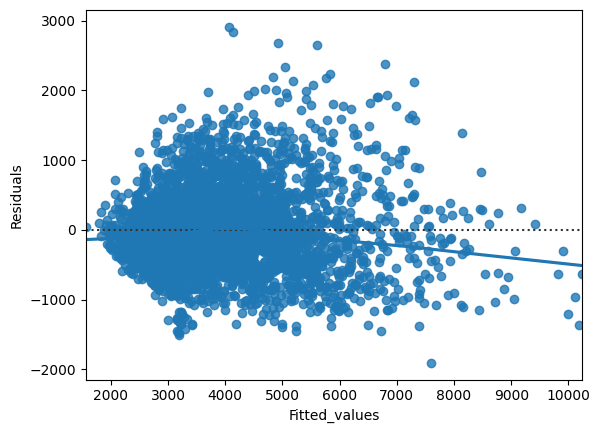

In [192]:
sns.residplot(data=df_pred,x="Fitted_values",y="Residuals",lowess=True)

<Axes: xlabel='Residuals', ylabel='Density'>

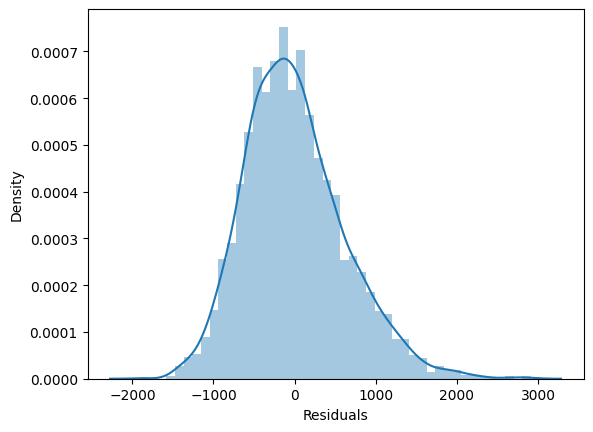

In [193]:
sns.distplot(df_pred["Residuals"],kde=True)

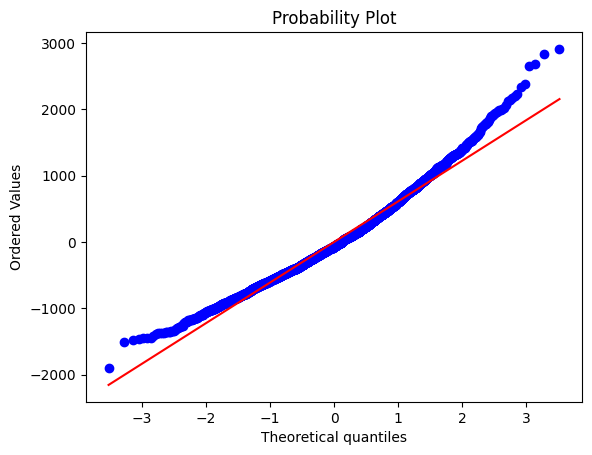

In [194]:
import pylab
import scipy.stats as stats
stats.probplot(df_pred["Residuals"],dist="norm",plot=pylab)
plt.show()

In [195]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [196]:
name=["F-statistic","p-value"]
test=sms.het_goldfeldquandt(df_pred["Residuals"],x_train2)
lzip(name,test)

[('F-statistic', 1.0439372714835353), ('p-value', 0.19756211621915615)]

In [197]:
x_test1=x_test.drop(["ExistingProdType","Designation"],axis=1)

In [198]:
y_pred=ols_res.predict(x_test1)

In [199]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
rmse=np.sqrt(mean_squared_error(y_train,df_pred["Fitted_values"]))
rmse

618.9755058868277

In [200]:
rmse1=np.sqrt(mean_squared_error(y_test,y_pred))
rmse1

630.3353323675233

In [201]:
mae_train=mean_squared_error(y_train,df_pred["Fitted_values"])
mae_train

383130.6768878543

In [202]:
mae_test=mean_squared_error(y_test,y_pred)
mae_test

397322.6312308761